In [1]:
# 경고(warning) 무시
import warnings
warnings.filterwarnings('ignore')

# 제9장 잠재고객을 파악하기위한 이미지 인식 테크닉 10

### 테크닉 81 : 이미지 데이터를 불러오자

In [ ]:
# opencv 설치
!pip install opencv-python

In [2]:
import cv2
img = cv2.imread("img/img01.jpg")
height, width = img.shape[:2]
print("이미지 가로: " + str(width))
print("이미지 세로: " + str(height))
cv2.namedWindow("img",cv2.WINDOW_NORMAL)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

이미지 가로: 1920
이미지 세로: 1440


### 테크닉 82 : 동영상 데이터를 불러오자

In [ ]:
import cv2

# 정보 취득 #
cap = cv2.VideoCapture("mov/mov01.avi")
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
print("가로: " + str(width))
print("세로: " + str(height))
print("총 프레임수: " + str(count))
print("FPS: " + str(fps))

# 출력 #
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

### 테크닉 83 : 동영상을 이미지로 나누고 저장하자

In [ ]:
import cv2
cap = cv2.VideoCapture("mov/mov01.avi")
num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow("frame", frame)
        filepath = "snapshot/snapshot_" + str(num) + ".jpg"
        cv2.imwrite(filepath,frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    num = num + 1
cap.release()
cv2.destroyAllWindows()

### 테크닉 84 : 이미지 속에 사람이 어디에 있는지 검출해보자

In [15]:
import cv2

# 준비 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'groupThreshold':5.5}

# 검출 #
img = cv2.imread("img/img01.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
human, r = hog.detectMultiScale(gray, **hogParams)
if (len(human)>0):
    for (x, y, w, h) in human:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255,255,255), 3)

cv2.namedWindow("img",cv2.WINDOW_NORMAL)
cv2.imshow("img",img)
cv2.imwrite("temp.jpg",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 테크닉 85 : 이미지 속의 사람의 얼굴을 검출해보자

In [21]:
import cv2

# 준비
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 검출
img = cv2.imread("img/img02.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(gray, minSize=(50, 50))

# 검출한 얼굴 표시하기
for (x, y, w, h) in face_list:
    color = (0, 0, 225)
    pen_w = 3
    cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness = pen_w)

cv2.namedWindow("img",cv2.WINDOW_NORMAL)
cv2.imshow("img",img)
cv2.imwrite("temp.jpg",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 테크닉 86 : 이미지 속의 사람의 얼굴이 어느쪽을 보고 있는지 검출해보자

In [ ]:
!pip install CMake
!pip install dlib
# conda (위에 에러났을 경우, 아나콘다 프롬프트에서)
conda install -c conda-forge dlib

In [25]:
import cv2
import dlib
import math

# 준비 #
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# 검출 #
img = cv2.imread("img/img02.jpg")
dets = detector(img, 1)

for k, d in enumerate(dets):
    shape = predictor(img, d)

    # 얼굴 영역 표시
    color_f = (0, 0, 225)
    color_l_out = (255, 0, 0)
    color_l_in = (0, 255, 0)
    line_w = 3
    circle_r = 3
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
    cv2.putText(img, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)

    # 중심을 계산할 사각형 준비
    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0
    gy_out = 0
    gx_in = 0
    gy_in = 0
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        #print("얼굴 랜드마크No.{} 좌표 위치: ({},{})".format(shape_point_count, shape_point.x, shape_point.y))
        #얼굴 랜드마크마다 그리기
        if shape_point_count<num_of_points_out:
            cv2.circle(img,(shape_point.x, shape_point.y),circle_r,color_l_out, line_w)
            gx_out = gx_out + shape_point.x/num_of_points_out
            gy_out = gy_out + shape_point.y/num_of_points_out
        else:
            cv2.circle(img,(shape_point.x, shape_point.y),circle_r,color_l_in, line_w)
            gx_in = gx_in + shape_point.x/num_of_points_in
            gy_in = gy_in + shape_point.y/num_of_points_in

    # 중심 위치 표시
    cv2.circle(img,(int(gx_out), int(gy_out)),circle_r,(0,0,255), line_w)
    cv2.circle(img,(int(gx_in), int(gy_in)),circle_r,(0,0,0), line_w)

    # 얼굴 방향 계산
    theta = math.asin(2*(gx_in-gx_out)/(d.right()-d.left()))
    radian = theta*180/math.pi
    print("얼굴 방향:{} (각도:{}도)".format(theta,radian))

    # 얼굴 방향 표시
    if radian<0:
        textPrefix = "   left "
    else:
        textPrefix = "   right "
    textShow = textPrefix + str(round(abs(radian),1)) + " deg."
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)


# cv2.imshow("img",img)
# cv2.imwrite("temp.jpg",img)
# cv2.waitKey(0)

cv2.namedWindow("img",cv2.WINDOW_NORMAL)
cv2.imshow("img",img)
cv2.imwrite("temp.jpg",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

얼굴 방향:0.06456096931747406 (각도:3.6990710631648662도)


### 테크닉 87 : 검출한 정보를 종합해서, 타임랩스를 만들어보자

In [27]:
import cv2

print("타임랩스 생성 시작")

# 동영상 읽어오기 #
cap = cv2.VideoCapture("mov/mov01.avi")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# hog 선언 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'groupThreshold':5}

# 타임랩스 작성 #
movie_name = "timelapse.avi"
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
video = cv2.VideoWriter(movie_name,fourcc, 30, (width,height))

num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)

            video.write(frame)
    else:
        break
    num = num + 1
video.release()
cap.release()
cv2.destroyAllWindows()
print("타임랩스 생성 완료")

타임랩스 생성 시작
타임랩스 생성 완료


### 테크닉 88 : 전체모습을 그래프로 가시화해보자

In [30]:
import cv2
import pandas as pd

print("분석 시작")
# 동영상 읽어오기 #
cap = cv2.VideoCapture("mov/mov01.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

# hog 선언 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'groupThreshold':5}

num = 0
list_df = pd.DataFrame( columns=['time','people'] )
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            tmp_se = pd.Series( [num/fps,len(human) ], index=list_df.columns )
            list_df = list_df.append( tmp_se, ignore_index=True )       
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break
    num = num + 1
cap.release()
cv2.destroyAllWindows()
print("분석 종료")

분석 시작
분석 종료


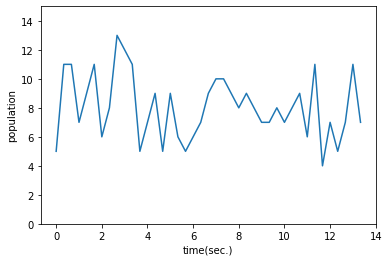

In [31]:
import matplotlib.pyplot as plt
plt.plot(list_df["time"], list_df["people"])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.show()

### 테크닉 89 : 거리의 변화를 그래프로 확인해보자

In [32]:
import cv2
import pandas as pd

print("분석 시작")
# 동영상 읽어오기 #
cap = cv2.VideoCapture("mov/mov02.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

# hog 선언 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'groupThreshold':5}

num = 0
list_df2 = pd.DataFrame( columns=['time','people'] )
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            tmp_se = pd.Series( [num/fps,len(human) ], index=list_df.columns )
            list_df2 = list_df2.append( tmp_se, ignore_index=True )       
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break
    num = num + 1
cap.release()
cv2.destroyAllWindows()
print("분석 종료")

분석 시작
분석 종료


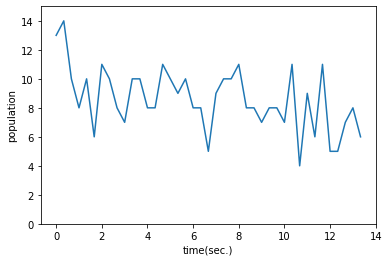

In [33]:
import matplotlib.pyplot as plt
plt.plot(list_df2["time"], list_df2["people"])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.show()

### 테크닉 90 : 이동평균을 계산해서 노이즈를 제거하자

In [34]:
import numpy as np
def moving_average(x, y):
    y_conv = np.convolve(y, np.ones(5)/float(5), mode='valid') # 합성곱 연산
    x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv))
    return x_dat, y_conv

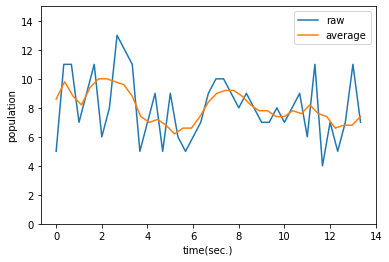

In [35]:
plt.plot(list_df["time"], list_df["people"], label="raw")
ma_x, ma_y = moving_average(list_df["time"], list_df["people"])
plt.plot(ma_x,ma_y, label="average")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()

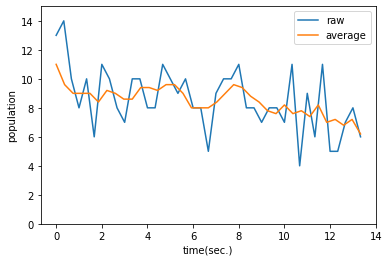

In [36]:
plt.plot(list_df2["time"], list_df2["people"], label="raw")
ma_x2, ma_y2 = moving_average(list_df2["time"], list_df2["people"])
plt.plot(ma_x2,ma_y2, label="average")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()

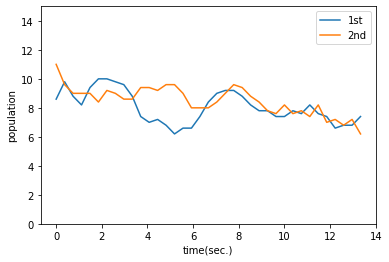

In [37]:
plt.plot(ma_x,ma_y, label="1st")
plt.plot(ma_x2,ma_y2, label="2nd")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()